<a href="https://colab.research.google.com/github/dtee1/ELG5255-Applied-Machine-Learning/blob/dev/Assignment_1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import svm, datasets
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [ ]:
def loadDataset(): 
  dumd_test = pd.read_csv("DUMD_test.csv")
  dumd_train = pd.read_csv("DUMD_train.csv")
  return dumd_test, dumd_train

In [ ]:
def produceDataset(features):
  data_test, data_train = loadDataset()
  labelEncoder = LabelEncoder()
  data_train["UNS_N"] = labelEncoder.fit_transform(data_train["UNS"])
  data_test["UNS_N"] = labelEncoder.fit_transform(data_test["UNS"])
  X_test = data_test[features]
  X_train = data_train[features]
  y_test = data_test.UNS_N
  y_train = data_train.UNS_N
  return X_train, X_test, y_train, y_test, data_train

In [ ]:
def plotData(data,feat_i, feat_j):
  colors = ['r', 'b', 'g','y']
  markers = ['o', '*', '+','d']
  
  plt.scatter(data[feat_i][data.UNS_N == 0], data[feat_j][data.UNS_N == 0], c='r', marker='o', label='Very Low')
  plt.scatter(data[feat_i][data.UNS_N == 1], data[feat_j][data.UNS_N == 1], c='b', marker='*', label='Low')
  plt.scatter(data[feat_i][data.UNS_N == 2], data[feat_j][data.UNS_N == 2], c='g', marker='+', label='Medium')
  plt.scatter(data[feat_i][data.UNS_N == 3], data[feat_j][data.UNS_N == 3], c='y', marker='d', label='High')
  
  Title = "DUMD Dataset with 4 classes"
  plt.title(Title)
  plt.xlabel('LPR')
  plt.ylabel('PEG')
  plt.legend()

In [ ]:
def plotRegions(model, X):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  z = model.predict(np.c_[XX.ravel(), YY.ravel()])
  ZZ = z.reshape(XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=0.2)

In [ ]:
def getAccuracy(model, x, y):
    return model.score(x,y)*100

In [ ]:
# this function can be used to plot the decision boundary Copied from prof
def plotDecisionBoundary( X, y, model, title=''):
    plt.close('all')
    plt.figure()
    cm = plt.cm.Set1
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cm,
        edgecolors='k',
        alpha=1,
    )
    plt.title(title)

Accuracy of model_svg: 100.00%

Classification Report using SVM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        11

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Confusion Matrix using SVM:

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  0 22  0]
 [ 0  0  0 11]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Accuracy of model_svg: 73.75%

Classification Report using SVM:

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       0.71      0.58      0.64        26
           2       0.80      0.55      0.65        22
           3       0.58      1.00      0.73        11

    accuracy                           0.74        80
   macro avg       0.73      0.78      0.73        80
weighted avg       0.75      0.74      0.73        80


Confusion Matrix using SVM:

[[21  0  0  0]
 [ 0 15  3  8]
 [ 4  6 12  0]
 [ 0  0  0 11]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


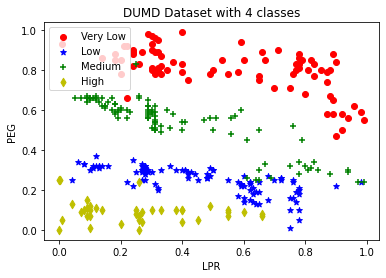

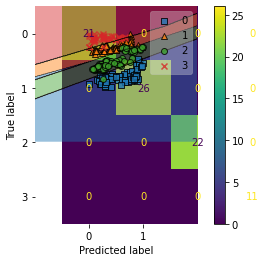

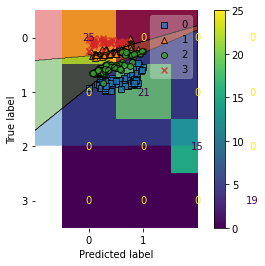

In [ ]:
def main():

  features = ['LPR','PEG']
  categories = [0,1,2,3]
  X_train, X_test, y_train, y_test, data_train = produceDataset(features)
  model_svg = svm.SVC(kernel='linear', decision_function_shape='ovo', C=100)
  model_svg.fit(X_train, y_train)
  
  plotData(data_train, features[0], features[1])

  y_true_svg, y_pred_svg = y_test, model_svg.predict(X_test)

  print('Accuracy of model_svg: {:.2f}%'.format(getAccuracy(model_svg, X_test, y_test)))

  print('\nClassification Report using SVM:\n')
  print(classification_report(y_true_svg, y_pred_svg))

  print('\nConfusion Matrix using SVM:\n')
  print(confusion_matrix(y_test, y_pred_svg))
  ConfusionMatrixDisplay.from_estimator(model_svg, X_test, y_pred_svg)

  X_numpy = np.array(X_train)
  y_numpy = np.array(y_train)

  plot_decision_regions(X_numpy, y_numpy, model_svg)


  # Using Perceptron 
  model_percep = Perceptron(random_state=1)
  model_percep.fit(X_train, y_train)

  y_true_percep, y_pred_percep = y_test, model_percep.predict(X_test)
  print('Accuracy of model_svg: {:.2f}%'.format(getAccuracy(model_percep, X_test, y_test)))

  print('\nClassification Report using SVM:\n')
  print(classification_report(y_true_percep, y_pred_percep))

  print('\nConfusion Matrix using SVM:\n')
  print(confusion_matrix(y_test, y_pred_percep))
  ConfusionMatrixDisplay.from_estimator(model_percep, X_test, y_pred_percep)

  plot_decision_regions(X_numpy, y_numpy, model_percep)

if __name__ == '__main__':
    main()